# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Evan Manuel Tan
- **Email:** evanmanuel1674@gmail.com
- **ID Dicoding:** evanmantan

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana faktor cuaca mempengaruhi jumlah pengguna jasa rental sepeda?
- Pertanyaan 2: Bagaimana persebaran jumlah pengguna pada jam-jam tertentu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Proyek ini akan menggunakan dataset penyewaan sepeda. Dataset ini disediakan dalam 2 rentang waktu, yaitu data harian dan data per jam. 

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kedua dataset memiliki kolom yang mirip, dengan hour.csv memiliki tambahan kolom `hr`.
- Data ini dapat digunakan untuk analisa faktor pendukung dan penghambat jumlah penyewaan sepeda.

### Assessing Data
Setelah **Gathering Data**, maka dilakukan **Assessing Data** untuk menilai kualitas dari data yang akan digunakan. Pada tahapan ini, dilakukan pembedahan struktur data, pengecekan duplikat dan missing value, serta melihat distribusi data.

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


kolom `dteday` pada **day.csv** memiliki tipe data yang keliru, seharusnya tipe data **datetime**, bukan **object**

In [5]:
print("Jumlah duplikasi day_df:", day_df.duplicated().sum())

Jumlah duplikasi day_df: 0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


kolom `dteday` pada **hour.csv** juga memiliki tipe data yang keliru, seharusnya tipe data **datetime**, bukan **object**

In [8]:
print("Jumlah duplikasi hour_df:", hour_df.duplicated().sum())

Jumlah duplikasi hour_df: 0


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Ada **731 hari** yang tercatat dalam dataset *day.csv* dan ada **13739 jam** yang tercatat dalam dataset *hour.csv*.
- Ada tipe data yang keliru pada kedua dataset.
- Ada ketimpangan jumlah entri antara kedua dataset karena jumlah jam yang seharusnya dalam **731 hari** bukanlah 13739 jam melainkan **17.544 jam** (731 hari x 24 jam). *Hal ini menunjukkan adanya kemungkinan bahwa kedua dataset ini tidak berhubungan atau dataset day.csv mencatat lebih banyak entri*.

### Cleaning Data
Pada tahap ini, akan dilakukan pembersihan dataset, contohnya penyesuaian tipe data dan rescaling data (mengembalikan data yang telah dinormalisasi ke skala semula).

In [10]:
clean_day_df = day_df.copy()
clean_hour_df = hour_df.copy()

In [11]:
clean_day_df["dteday"] = pd.to_datetime(day_df["dteday"])
clean_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
clean_hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
clean_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [13]:
# Rescaling
def rescale(x):
    x["temp"] = round(x["temp"] * 41, 1)
    x["atemp"] = round(x["atemp"] * 50, 1)
    x["hum"] = round(x["hum"] * 100, 1)
    x["windspeed"] = round(x["windspeed"] * 67, 1)
    return x

clean_day_df = clean_day_df.apply(rescale, axis=1)
clean_day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.1,18.2,80.6,10.7,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.9,17.7,69.6,16.7,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.1,9.5,43.7,16.6,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.2,10.6,59.0,10.7,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.3,11.5,43.7,12.5,82,1518,1600


In [14]:
clean_hour_df = clean_hour_df.apply(rescale, axis=1)

**Insight:**
- Dataset yang digunakan sudah memiliki format yang rapi dari sumber datanya, sehingga tidak perlu banyak proses **Cleaning Data**.
- Beberapa kolom dataset (temp, atemp, hum, windspeed) dilakukan scaling agar memiliki nilai yang **human-readable**.

## Exploratory Data Analysis (EDA)
Pada tahap ini, dilakukan eksplorasi data untuk mendapatkan insight-insight yang bisa menjadi jawaban untuk pertanyaan bisnis

### Explore kolom weathersit

In [15]:
clean_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.311081,23.717921,62.788235,12.763748,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.400000,4.000000,0.000000,1.500000,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.800000,16.900000,52.000000,9.000000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.400000,24.300000,62.700000,12.100000,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.900000,30.450000,73.000000,15.600000,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.300000,42.000000,97.200000,34.000000,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505689,8.146966,14.243462,5.192322,686.622488,1560.256377,1937.211452


In [16]:
clean_day_df.groupby(by="weathersit").agg({
    "dteday": "nunique",
    "casual": ["mean", "min", "max"],
    "registered": ["mean", "min", "max"],
    "cnt": ["mean", "min", "max"]
})

dteday      casual             registered                     cnt  \
           nunique        mean min   max         mean  min   max         mean   
weathersit                                                                      
1              463  964.030238  15  3410  3912.755940  416  6946  4876.786177   
2              247  687.352227   9  3155  3348.510121  491  6844  4035.862348   
3               21  185.476190   2  1264  1617.809524   20  4324  1803.285714   

                       
            min   max  
weathersit             
1           431  8714  
2           605  8362  
3            22  4639

In [17]:
clean_hour_df.groupby(by="weathersit").agg({
    "dteday": "nunique",
    "casual": ["mean", "min", "max"],
    "registered": ["mean", "min", "max"],
    "cnt": ["mean", "min", "max"]
})

dteday     casual           registered                  cnt      \
           nunique       mean min  max        mean min  max        mean min   
weathersit                                                                    
1              700  40.545431   0  367  164.323841   0  886  204.869272   1   
2              567  29.595290   0  350  145.570202   0  822  175.165493   1   
3              300  16.055673   0  263   95.523608   0  791  111.579281   1   
4                3   2.666667   1    6   71.666667  22  158   74.333333  23   

                 
            max  
weathersit       
1           977  
2           957  
3           891  
4           164

**Keterangan Indeks weathersit**:

1. Cerah dan Sedikit Berawan
2. Kabut dan Berawan
3. Hujan/Salju Ringan dan Berawan
4. Hujan Lebat, Badai, atau Salju

Berdasarkan 2 tabel di atas, dapat disimpulkan bahwa faktor cuaca berpengaruh pada jumlah pengguna jasa rental sepeda, dengan cuaca **Cerah dan Sedikit Berawan sebagai hari favorit**. Tidak jauh dari tebakan intuisi, namun setidaknya sekarang ada data  yang mengonfirmasi bahwa orang cenderung menggunakan jasa rental ini saat cuaca lebih cerah.

### Explore kolom season (musim)

In [18]:
clean_day_df.groupby(by="season").agg({
    "dteday": "nunique",
    "casual": ["mean", "min", "max"],
    "registered": ["mean", "min", "max"],
    "cnt": ["mean", "min", "max"]
})

dteday       casual              registered                     cnt  \
       nunique         mean  min   max         mean  min   max         mean   
season                                                                        
1          181   334.928177    9  3155  2269.204420  416  5315  2604.132597   
2          184  1106.097826  120  3410  3886.233696  674  6456  4992.331522   
3          188  1202.611702  118  3160  4441.691489  889  6917  5644.303191   
4          178   729.112360    2  3031  3999.050562   20  6946  4728.162921   

                    
         min   max  
season              
1        431  7836  
2        795  8362  
3       1115  8714  
4         22  8555

**Keterangan Indeks season**:
1. Musim Semi
2. Musim Panas
3. Musim Gugur
4. Musim Dingin

Sebuah hal menarik dapat ditemukan di sini, yaitu musim semi menjadi musim dengan jumlah pengguna jasa rental sepeda paling sedikit.

### Explore kolom yr (tahun)

In [19]:
clean_day_df.groupby(by="yr").agg({
    "dteday": "nunique",
    "casual": ["mean", "min", "max"],
    "registered": ["mean", "min", "max"],
    "cnt": ["mean", "min", "max"]
})

dteday       casual             registered                     cnt       \
   nunique         mean min   max         mean  min   max         mean  min   
yr                                                                            
0      365   677.402740   9  3065  2728.358904  416  4614  3405.761644  431   
1      366  1018.483607   2  3410  4581.450820   20  6946  5599.934426   22   

          
     max  
yr        
0   6043  
1   8714

Terjadi peningkatan rata-rata jumlah pengguna jasa rental sepeda sebanyak 64% dari tahun 2011 ke tahun 2012

### Explore kolom mnth (bulan)

In [20]:
# 2011 months
clean_day_df[clean_day_df["yr"] == 0].groupby(by="mnth").agg({
    "dteday": "nunique",
    "casual": ["mean", "min", "max"],
    "registered": ["mean", "min", "max"],
    "cnt": ["mean", "min", "max"]
})

dteday       casual              registered                      cnt  \
     nunique         mean  min   max         mean   min   max         mean   
mnth                                                                         
1         31    99.129032    9   331  1132.774194   416  1844  1231.903226   
2         28   222.928571   47   694  1499.035714   905  2348  1721.964286   
3         31   413.741935   46  1424  1652.225806   491  2355  2065.967742   
4         30   744.866667  121  1965  2417.466667   674  3722  3162.333333   
5         31  1001.612903  255  2355  3379.709677  2213  4238  4381.322581   
6         30  1020.400000  513  1920  3763.333333  2993  4488  4783.733333   
7         31  1175.870968  562  3065  3383.516129  2298  4220  4559.387097   
8         31   930.387097  226  1914  3479.000000   889  4614  4409.387097   
9         30   884.833333  118  2521  3362.433333  1689  4372  4247.266667   
10        31   813.612903   57  2397  3170.612903   570  4267  3984.225806   
11        30   519.800000   69  1275  2885.766667   935  3891  3405.566667   
12        31   272.516129   50   706  2544.354839   451  3672  2816.870968   

                  
       min   max  
mnth              
1      431  1985  
2     1005  2927  
3      605  3239  
4      795  5312  
5     2633  5805  
6     3767  5515  
7     3285  6043  
8     1115  5895  
9     1842  5423  
10     627  5511  
11    1495  4486  
12     705  3940

In [21]:
# 2012 months
clean_day_df[clean_day_df["yr"] == 1].groupby(by="mnth").agg({
    "dteday": "nunique",
    "casual": ["mean", "min", "max"],
    "registered": ["mean", "min", "max"],
    "cnt": ["mean", "min", "max"]
})

dteday       casual              registered                      cnt  \
     nunique         mean  min   max         mean   min   max         mean   
mnth                                                                         
1         31   289.322581   67  1070  2831.451613  1234  4185  3120.774194   
2         29   300.724138   65  1435  3255.724138  1456  4546  3556.448276   
3         31  1019.935484  203  3155  4298.612903  2339  5893  5318.548387   
4         30  1281.866667  120  3252  4525.600000   907  5950  5807.466667   
5         31  1426.935484  342  3410  4891.290323  2501  6433  6318.225806   
6         30  1443.133333  477  2963  5317.866667  3594  6456  6761.000000   
7         31  1345.322581  747  2562  5222.645161  3195  6790  6567.967742   
8         31  1393.451613  935  2827  5526.000000  3341  6541  6919.451613   
9         30  1459.266667  371  3160  5826.500000  3197  6946  7285.766667   
10        31  1114.129032    2  3031  5300.096774    20  6911  6414.225806   
11        30   700.300000  123  2290  4388.500000  1470  5520  5088.800000   
12        31   427.258065    9  1153  3563.483871   432  6055  3990.741935   

                  
       min   max  
mnth              
1     1301  4521  
2     1529  5062  
3     3194  8362  
4     1027  7460  
5     2843  8294  
6     4127  8120  
7     4459  8173  
8     4549  7865  
9     4073  8714  
10      22  8156  
11    2277  6852  
12     441  6606

### Explore kolom holiday dan workingday

In [22]:
clean_day_df.groupby(by="holiday").agg({
    "dteday": "nunique",
    "casual": ["mean", "min", "max"],
    "registered": ["mean", "min", "max"],
    "cnt": ["mean", "min", "max"]
})

dteday       casual              registered                     cnt  \
        nunique         mean  min   max         mean  min   max         mean   
holiday                                                                        
0           710   841.771831    2  3410  3685.332394   20  6946  4527.104225   
1            21  1064.714286  117  3065  2670.285714  573  5172  3735.000000   

                     
          min   max  
holiday              
0          22  8714  
1        1000  7403

In [23]:
clean_day_df.groupby(by="workingday").agg({
    "dteday": "nunique",
    "casual": ["mean", "min", "max"],
    "registered": ["mean", "min", "max"],
    "cnt": ["mean", "min", "max"]
})

dteday       casual             registered             \
           nunique         mean min   max         mean  min   max   
workingday                                                          
0              231  1371.134199  54  3410  2959.034632  451  5966   
1              500   606.570000   2  2469  3978.250000   20  6946   

                    cnt             
                   mean  min   max  
workingday                          
0           4330.168831  605  8714  
1           4584.820000   22  8362

Berdasarkan 2 tabel di atas, dapat disimpulkan bahwa orang justru lebih cenderung menggunakan sepeda saat hari kerja (workingday) dibandingkan saat hari libur (holiday). Selain itu, ternyata pengguna yang terdaftar lebih sering memakai jasa sepeda rental saat hari kerja, hal ini dapat mengindikasikan bahwa pengguna terdaftar adalah orang yang aktif bersepeda saat hari kerja.

### Explore kolom weekday

In [24]:
# Excluding holidays
clean_day_df[clean_day_df["holiday"] == 0].groupby(by="weekday").agg({
    "dteday": "nunique",
    "casual": ["mean", "min", "max"],
    "registered": ["mean", "min", "max"],
    "cnt": ["mean", "min", "max"]
})

dteday       casual             registered                      cnt  \
        nunique         mean min   max         mean   min   max         mean   
weekday                                                                        
0           105  1338.295238  54  3283  2890.533333   451  5657  4228.828571   
1            90   600.266667   2  1233  3798.600000    20  6435  4398.866667   
2           103   557.310680   9  1348  3987.310680   674  6697  4544.621359   
3           103   531.621359   9  1383  3989.203883   432  6946  4520.825243   
4           102   587.696078  15  1405  4132.647059   416  6781  4720.343137   
5           102   756.431373  38  2469  3962.156863  1129  6917  4718.588235   
6           105  1465.257143  57  3410  3085.285714   570  5966  4550.542857   

                     
          min   max  
weekday              
0         605  8227  
1          22  7525  
2         683  7767  
3         441  8173  
4         431  7804  
5        1167  8362  
6         627  8714

Berdasarkan tabel di atas, dapat disimpulkan bahwa **hari Minggu** (*weekday 0, mengikuti standar Amerika bahwa hari pertama dalam satu pekan adalah hari Minggu*) menjadi **hari dengan paling sedikit pengguna**, dan **hari Kamis sebagai hari dengan paling banyak pengguna**. Walaupun begitu, tidak ada perbedaan signifikan pada jumlah pengguna jasa rental sepeda antara masing-masing hari.

### Explore kolom hr (jam)

In [25]:
clean_hour_df.groupby(by="hr").agg({
    "dteday": "nunique",
    "casual": ["mean", "min", "max"],
    "registered": ["mean", "min", "max"],
    "cnt": ["mean", "min", "max"]
})

dteday     casual           registered                  cnt         
   nunique       mean min  max        mean min  max        mean min  max
hr                                                                      
0      726  10.158402   0   68   43.739669   0  234   53.898072   2  283
1      724   6.504144   0   49   26.871547   0  139   33.375691   1  168
2      715   4.772028   0   44   18.097902   0  104   22.869930   1  132
3      697   2.715925   0   26    9.011478   0   61   11.727403   1   79
4      697   1.253945   0   13    5.098996   0   22    6.352941   1   28
5      717   1.411437   0   16   18.478382   0   64   19.889819   1   66
6      725   4.161379   0   19   71.882759   0  203   76.044138   1  213
7      727  11.055021   0   40  201.009629   1  572  212.064649   1  596
8      727  21.679505   0   69  337.331499   4  808  359.011004   5  839
9      727  30.891334   0  142  188.418157   6  399  219.309491  14  426
10     727  46.477304   0  209  127.191197   8  351  173.668501   8  539
11     727  59.540578   0  268  148.602476   5  446  208.143054  10  663
12     728  68.293956   0  362  185.021978   3  526  253.315934   3  776
13     729  72.308642   0  355  181.352538   9  491  253.661180  11  760
14     729  75.567901   0  361  165.381344  12  502  240.949246  12  750
15     729  74.905350   0  357  176.327846   4  456  251.233196   7  750
16     730  73.745205   0  367  238.238356   8  481  311.983562  11  783
17     730  74.273973   0  347  387.178082  14  885  461.452055  15  976
18     728  61.120879   0  266  364.390110  20  886  425.510989  23  977
19     728  48.770604   0  230  262.752747  11  662  311.523352  11  743
20     728  36.233516   0  237  189.796703   8  461  226.030220  11  567
21     728  28.255495   0  222  144.059066   6  362  172.314560   6  584
22     728  22.252747   0  175  109.082418   5  327  131.335165   9  502
23     728  15.199176   0   71   72.631868   2  220   87.831044   2  256

**Insight:**
- Waktu dengan rata-rata pengguna jasa sepeda rental paling banyak adalah pukul 17.00.
- Terjadi peningkatan rata-rata pengguna sebanyak 64% pada tahun 2012 dibandingkan tahun sebelumnya.

## Visualization & Explanatory Analysis
Pada tahap ini, dilakukan pembuatan representasi visual dari data untuk dapat menjelaskan hasil analisis dengan tepat

### Pertanyaan 1: Bagaimana faktor cuaca mempengaruhi jumlah pengguna jasa rental sepeda?

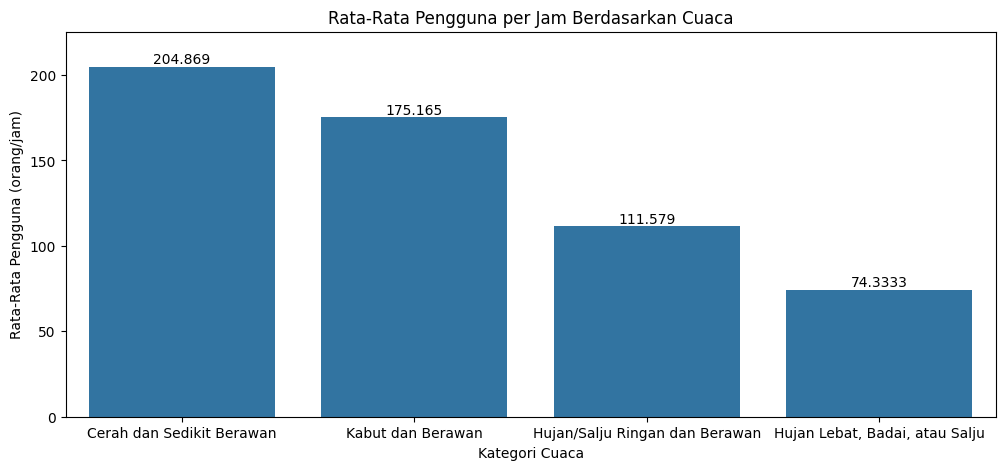

In [67]:
agg_data = clean_hour_df.groupby("weathersit")['cnt'].agg(['mean']).reset_index()
weather_label = {
    1: "Cerah dan Sedikit Berawan",
    2: "Kabut dan Berawan",
    3: "Hujan/Salju Ringan dan Berawan",
    4: "Hujan Lebat, Badai, atau Salju"
}

agg_data["weathersit"] = agg_data["weathersit"].replace(weather_label)

fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=agg_data["weathersit"], y=agg_data["mean"], ax=ax)
ax.bar_label(ax.containers[0], label_type="edge")
ax.margins(y=0.1)
ax.set_title("Rata-Rata Pengguna per Jam Berdasarkan Cuaca")
ax.set_ylabel("Rata-Rata Pengguna (orang/jam)")
ax.set_xlabel("Kategori Cuaca")
plt.show()

### Pertanyaan 2: Bagaimana persebaran jumlah pengguna pada jam-jam tertentu?

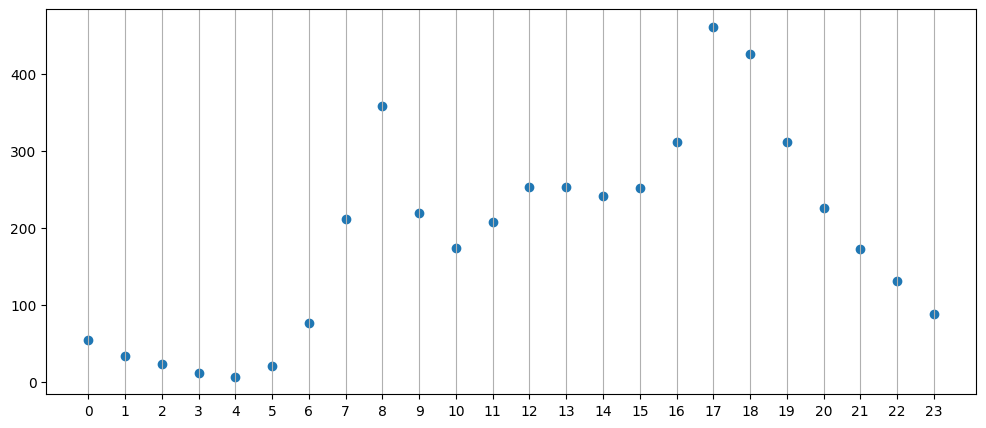

In [82]:
agg_data = clean_hour_df.groupby("hr")["cnt"].agg(["mean"]).reset_index()
plt.figure(figsize=(12,5))
plt.xticks(np.arange(24))
plt.grid(True, axis="x")
plt.scatter(agg_data["hr"], agg_data["mean"])
plt.show()

**Insight:**
- Berdasarkan data jumlah pengguna jasa rental sepeda per jam, didapatkan bahwa cuaca **Cerah dan Sedikit Berawan** menjadi cuaca dengan rata-rata pengguna paling banyak.
- Didapatkan juga bahwa **waktu paling ramai adalah pada jam 17**.

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan data jumlah pengguna jasa rental sepeda per jam, didapatkan bahwa cuaca **Cerah dan Sedikit Berawan** menjadi cuaca dengan rata-rata pengguna paling banyak.
- Didapatkan juga bahwa **waktu paling ramai adalah pada jam 17**.

## Export to CSV

In [84]:
clean_day_df.to_csv("dashboard/clean_day.csv", index=False)
clean_hour_df.to_csv("dashboard/clean_hour.csv", index=False)